> 
    Ayush Jain
    202218039

# ASSIGNMENT 4

Generate 1000 real number for the variable X from the uniform distribution U
[0,1].

Construct the training set T = { (x1,y1),(x2,y2),......,(x1000,y1000)}using the relation:

Yi = sin(2 π xi) + εi where εi ~ N(0,0.25).

In the similar way construct a testing set of size 50 i,e:

Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(123)

#Training Set:
X_train = np.random.uniform(0,1,1000)
E = np.random.normal(0,0.25,1000)
Y_train = np.sin(2*3.14*X_train)+E

#Testing Set:
X_test = np.random.uniform(0,1,50)
e = np.random.normal(0,0.25,50)
Y_test = np.sin(2*3.14*X_test)+e


1. Find the best fit using Least Square gradient descent, considering
polynomial basis function of order 8. Find the best RMSE MAE and R^2 by
tuning the value regularization parameter λ. Also obtain the corresponding
plot of best fit.

In [5]:
def RMSE(predicted,actual):
    return np.sqrt(np.mean((predicted - actual) ** 2))

def MAE(predicted,actual):
    return np.mean(np.absolute(predicted - actual))

def R2(predicted,actual):
    SSR = np.sum((predicted - actual) ** 2)
    SST = np.sum((predicted - np.mean(predicted)) ** 2)
    return (1 - (SSR / SST))

def A_matrix(order,X):
    m = order+1
    n = len(X)
    A = np.zeros((n,m))
    for i in range(len(X)):
        for j in range(m):
            A[i,j] = X[i]**j
    return A

def predict(order,X_test,W):
    Ax = A_matrix(order,X_test)
    return Ax @ W

def gradient_descent(A_Matrix,Y,order,lamda,tolerance=0.00001,learning_rate=0.0001,iterations=100000):
    Omega1 = np.zeros(order+1)
    Omega0 = np.ones(order+1)
    itr = 0

    while itr < iterations and np.linalg.norm(Omega1-Omega0) > tolerance:
        Omega0 = Omega1
        gradient = (lamda*Omega0) - (A_Matrix.T @ (Y - A_Matrix @ Omega0))
        Omega1 = Omega0 - (learning_rate*gradient)
        itr = itr + 1

    return Omega1

def GD_parameter_tuning(order, X_train, Y_train):
    lamda = [2**i for i in range(-12,12)]
    parameters = []
    A = A_matrix(order,X_train)

    for i in range(len(lamda)):
        W = gradient_descent(A,Y_train,order,lamda[i])
        prediction = A @ W
        rmse = RMSE(prediction,Y_train)
        parameters.append((rmse,W,lamda[i]))

    minimum = min(parameters)

    return minimum


In [6]:
#Best Fit:
#Parameters:
train_rmse, Coeff, lamda = GD_parameter_tuning(8,X_train,Y_train)

y_pred = predict(8,X_test,Coeff)

print(f'''
Train RMSE: {train_rmse}
Lambda : {lamda}
Test RMSE: {RMSE(y_pred,Y_test)}
Test MAE: {MAE(y_pred,Y_test)}
Test R2: {R2(y_pred,Y_test)}
''')



Train RMSE: 0.2617434338285825
Lambda : 0.000244140625
Test RMSE: 0.27723113578932934
Test MAE: 0.22951122201427004
Test R2: 0.8521012775208332



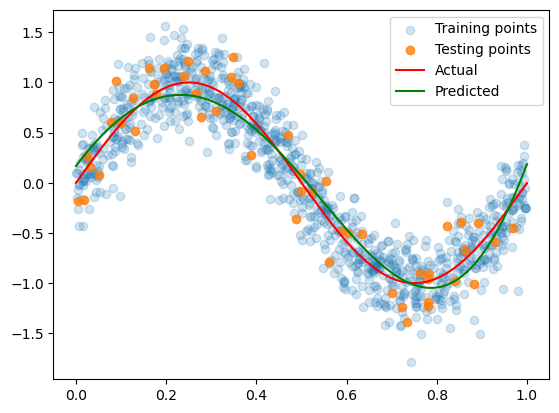

In [7]:
#Plot:

X_points = np.linspace(0, 1, 100)
Y_points = np.sin(2*3.14*X_points)

plt.scatter(X_train, Y_train, label = "Training points", alpha=0.2)
plt.scatter(X_test, Y_test,label = "Testing points", alpha=0.8)

plt.plot(X_points,Y_points,color = "red", label = "Actual")

Y_pred = predict(8,X_points,Coeff)
plt.plot(X_points,Y_pred,color = "green", label = "Predicted")

plt.legend()
plt.show()

2. Find the best fit using a direct method, considering Least Square RBF
(Gaussian) Kernel . Find the best RMSE ,MAE and R^2 by tuning the value
RBF (Gaussian Kernel) and regularization parameter . Also obtain the
corresponding plot of best fit.

In [8]:
def kernel_matrix(X,Z,sigma):
    A = np.zeros((len(X),len(Z)))
    for i in range(len(X)):
        for j in range(len(Z)):
            A[i,j] =  np.exp(-1*((np.linalg.norm([X[i],Z[j]]))/(2*(sigma**2))))
    return A

def kernel_parameter_tuning(X,Y):
    lamda = [ 2**i for i in range(-12,1)]
    sigma = [ 2**i for i in range(-12,1)]
    I = np.identity(len(X))
    parameters = []
    for i in range(len(sigma)):
        A = kernel_matrix(X,X,sigma[i])
        for j in range(len(lamda)):
            coeff = np.dot(np.linalg.inv(np.dot(A.T,A)+lamda[j]*I),np.dot(A.T,Y))
            prediction = np.dot(A,coeff)
            rmse = RMSE(prediction,Y)
            parameters.append((rmse,lamda[j],sigma[i], coeff))
    
    minimum = min(parameters)

    return minimum

def kernel_prediction(X_train,X_test,sigma,Coeff):
    A = kernel_matrix(X_test,X_train,sigma)
    return np.dot(A,Coeff)

In [9]:
#Parameters:
train_rmse, lamda, sigma, coeff = kernel_parameter_tuning(X_train,Y_train)
#Prediction:
y_pred = kernel_prediction(X_train,X_test,sigma,coeff)

print(f'''
Train RMSE: {train_rmse}
Lambda: {lamda}
Sigma: {sigma}
Test RMSE: {RMSE(y_pred,Y_test)}
Test MAE: {MAE(y_pred,Y_test)}
Test R2: {R2(y_pred,Y_test)}
''')


Train RMSE: 0.26644802659958633
Lambda: 0.000244140625
Sigma: 1
Test RMSE: 0.26524097640894007
Test MAE: 0.22299524721761085
Test R2: 0.858739281843279



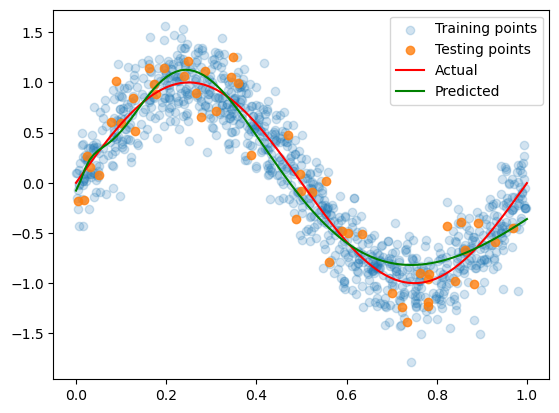

In [10]:
#Plot:
X_points = np.linspace(0, 1, 100)
Y_points = np.sin(2*3.14*X_points)

plt.scatter(X_train, Y_train, label = "Training points", alpha=0.2)
plt.scatter(X_test, Y_test,label = "Testing points", alpha=0.8)

plt.plot(X_points,Y_points,color = "red", label = "Actual")

Y_pred = kernel_prediction(X_train,X_points,sigma,coeff)
plt.plot(X_points,Y_pred,color = "green", label = "Predicted")

plt.legend()
plt.show()

3. Find the best fit using kernel gradient descent, considering RBF (Gaussian
Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian
Kernel) and regularization parameter sigma. Also obtain the corresponding
plot of best fit.

In [11]:
def kernel_gradient_descent(X,Y,sigma,lamda,tolerance=0.00001,learning_rate=0.000001,iterations=100000):
    Omega1 = np.zeros(len(X))
    Omega0 = np.ones(len(X))
    itr = 0
    K_Matrix = kernel_matrix(X,X,sigma)
    while itr < iterations and np.linalg.norm(Omega1-Omega0) > tolerance:
        Omega0 = Omega1
        gradient = (lamda*Omega0) - (K_Matrix.T @ (Y - K_Matrix @ Omega0))
        Omega1 = Omega0 - (learning_rate*gradient)
        itr = itr + 1

    return Omega1

In [12]:
#Parameters from previous Model:
sigma = 1
lamda = 0.000244

#Coeff using Gradient Descent
Coeff = kernel_gradient_descent(X_train,Y_train,sigma,lamda)

#Predictions
train_pred = kernel_prediction(X_train,X_train,sigma,Coeff)
y_pred = kernel_prediction(X_train,X_test,sigma,Coeff)

print(f'''
Train RMSE: {RMSE(train_pred,Y_train)}
Lambda: {lamda}
Sigma: {sigma}
Test RMSE: {RMSE(y_pred,Y_test)}
Test MAE: {MAE(y_pred,Y_test)}
Test R2: {R2(y_pred,Y_test)}
''')


Train RMSE: 0.4583452910215591
Lambda: 0.000244
Sigma: 1
Test RMSE: 0.4712252611998014
Test MAE: 0.39580391735734316
Test R2: 0.31995234503105174



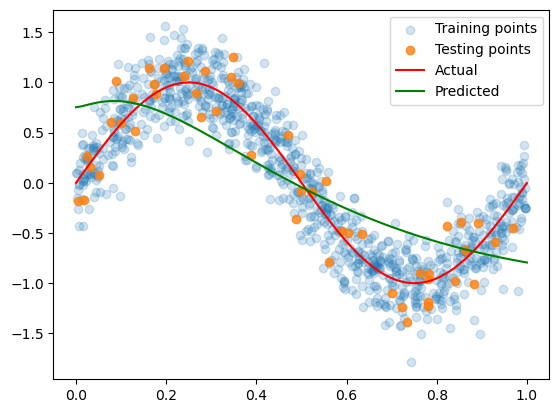

In [13]:
#Plot:
X_points = np.linspace(0, 1, 100)
Y_points = np.sin(2*3.14*X_points)

plt.scatter(X_train, Y_train, label = "Training points", alpha=0.2)
plt.scatter(X_test, Y_test,label = "Testing points", alpha=0.8)

plt.plot(X_points,Y_points,color = "red", label = "Actual")

Y_pred = kernel_prediction(X_train,X_points,sigma,Coeff)
plt.plot(X_points,Y_pred,color = "green", label = "Predicted")

plt.legend()
plt.show()

4. Modify the training set T by picking up randomly 20 data points from the
training set T and scale their yi values by 25. Find the best fit using normal
gradient descent and kernel gradient descent, considering RBF (Gaussian
Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian Kernel) and regularization parameter sigma. Also obtain the corresponding
plot of best fit.

In [14]:
randomPoints = np.random.randint(1,1001,20)

print(Y_train[randomPoints])

Y_train[randomPoints] = Y_train[randomPoints]*25

Y_train[randomPoints]

[ 0.84895332 -0.35315202 -1.2106848   1.44490451  0.66180208 -0.85772465
  1.06017206 -0.81849105 -0.3262713   1.27976197  0.66664327  1.0096863
  0.04414963 -0.84682462 -0.93551652 -0.79191778  0.84532018  0.83634548
 -0.69109223 -1.2172454 ]


array([ 21.22383305,  -8.82880045, -30.26711988,  36.12261286,
        16.5450521 , -21.44311628,  26.50430162, -20.46227636,
        -8.15678261,  31.99404927,  16.66608177,  25.24215738,
         1.10374085, -21.17061545, -23.38791289, -19.79794451,
        21.13300459,  20.90863699, -17.27730577, -30.43113502])


Train RMSE: 3.0440640411226294
Lambda : 0.000244140625
Test RMSE: 0.5102516803202848
Test MAE: 0.42702996176645847
Test R2: 0.8163110400525044



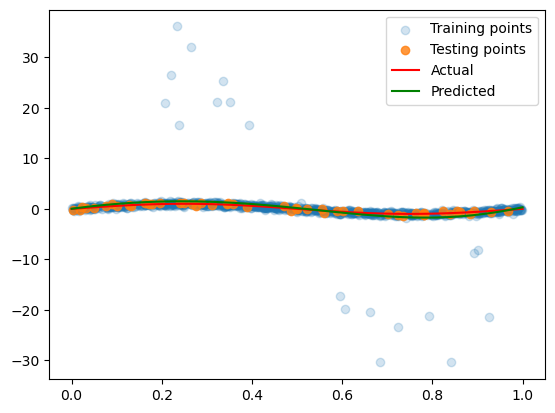

In [15]:
#Normal Gradient Descent:
#Parameters:
train_rmse, Coeff, lamda = GD_parameter_tuning(8,X_train,Y_train)

y_pred = predict(8,X_test,Coeff)

print(f'''
Train RMSE: {train_rmse}
Lambda : {lamda}
Test RMSE: {RMSE(y_pred,Y_test)}
Test MAE: {MAE(y_pred,Y_test)}
Test R2: {R2(y_pred,Y_test)}
''')

#Plot:
X_points = np.linspace(0, 1, 100)
Y_points = np.sin(2*3.14*X_points)

plt.scatter(X_train, Y_train, label = "Training points", alpha=0.2)
plt.scatter(X_test, Y_test,label = "Testing points", alpha=0.8)

plt.plot(X_points,Y_points,color = "red", label = "Actual")

Y_pred = predict(8,X_points,Coeff)
plt.plot(X_points,Y_pred,color = "green", label = "Predicted")

plt.legend()
plt.show()



Train RMSE: 3.115319827787067
Lambda: 0.000244
Sigma: 1
Test RMSE: 0.5174711423825236
Test MAE: 0.39153401615838135
Test R2: 0.6745998365142412



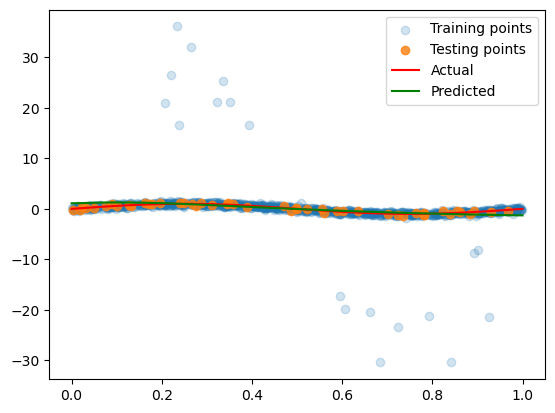

In [16]:
#Kernel Gradient Descent:
#Parameters from previous Model:
sigma = 1
lamda = 0.000244

#Coeff using Gradient Descent
Coeff = kernel_gradient_descent(X_train,Y_train,sigma,lamda)

#Predictions
train_pred = kernel_prediction(X_train,X_train,sigma,Coeff)
y_pred = kernel_prediction(X_train,X_test,sigma,Coeff)

print(f'''
Train RMSE: {RMSE(train_pred,Y_train)}
Lambda: {lamda}
Sigma: {sigma}
Test RMSE: {RMSE(y_pred,Y_test)}
Test MAE: {MAE(y_pred,Y_test)}
Test R2: {R2(y_pred,Y_test)}
''')

#Plot:
X_points = np.linspace(0, 1, 100)
Y_points = np.sin(2*3.14*X_points)

plt.scatter(X_train, Y_train, label = "Training points", alpha=0.2)
plt.scatter(X_test, Y_test,label = "Testing points", alpha=0.8)

plt.plot(X_points,Y_points,color = "red", label = "Actual")

Y_pred = kernel_prediction(X_train,X_points,sigma,Coeff)
plt.plot(X_points,Y_pred,color = "green", label = "Predicted")

plt.legend()
plt.show()

5. Consider the motorcycle dataset. Find the best fit using Least Square kernel
Regression using stochastic gradient descent, considering RBF (Gaussian
Kernel). Find the best RMSE and MAE by tuning the value RBF (Gaussian
Kernel) and regularization parameter .Also obtain the corresponding plot of
best fit.

In [66]:
import pandas as pd

motorcycle_data = pd.read_csv(r'G:\My Drive\MSc DS sem2\ML\Lab Assignments\motorcycle - motorcycle.csv')

X = motorcycle_data.iloc[:,0]
Y = motorcycle_data.iloc[:,1]



In [85]:
def kernel_stochastic_gd(X,Y,sigma,lamda,tolerance=0.00001,learning_rate=0.001,iterations=1000):
    Omega1 = np.zeros(len(X))
    Omega0 = np.ones(len(X))
    itr = 0
    K_Matrix = kernel_matrix(X,X,sigma)
    while itr < iterations and np.linalg.norm(Omega1-Omega0) > tolerance:
        i = np.random.randint(len(X))
        a = K_Matrix[i]
        b = Y[i]
        Omega0 = Omega1
        gradient = (lamda*Omega0) - (a * (b - a.T @ Omega0))
        Omega1 = Omega0 - (learning_rate*gradient)
        itr = itr + 1

    return Omega1
    
def SGDkernel_parameter_tuning(X,Y):
    lamda = [ 2**i for i in range(-12,2)]
    sigma = [ 2**i for i in range(-12,2)]
    I = np.identity(len(X))
    parameters = []
    for i in range(len(sigma)):
        A = kernel_matrix(X,X,sigma[i])
        for j in range(len(lamda)):
            coeff = kernel_stochastic_gd(X,Y,sigma[i],lamda[j])
            prediction = np.dot(A,coeff)
            rmse = RMSE(prediction,Y)
            parameters.append((rmse,lamda[j],sigma[i], coeff))
    
    minimum = min(parameters)

    return minimum

In [86]:
#Parameters:
train_rmse, lamda, sigma, coeff = SGDkernel_parameter_tuning(X,Y)

#Prediction:
y_pred = kernel_prediction(X,X,sigma,coeff)

print(f'''
Lambda: {lamda}
Sigma: {sigma}
Train RMSE: {train_rmse}
Test MAE: {MAE(y_pred,Y)}
Test R2: {R2(y_pred,Y)}
''')


Lambda: 0.0625
Sigma: 2
Train RMSE: 52.43258032259447
Test MAE: 38.04782297862846
Test R2: -118.35423650965761



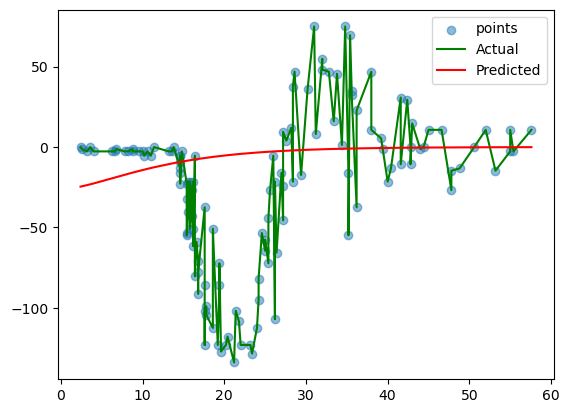

In [84]:
#Plot:
plt.scatter(X, Y, label = "points", alpha=0.5)

plt.plot(X,Y,color = "green", label = "Actual")

plt.plot(X,y_pred,color = "red", label = "Predicted")

plt.legend()
plt.show()